<a href="https://colab.research.google.com/github/YemisiTaiwo06/Titanic-Survivor-Prediction-Model/blob/main/Titanic_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*This is one of the projects I did in my AI learning class.*

**Project Question**

Be the hero of the day by predicting the survival of Titanic passengers

Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive.

In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy. GoodLuck!!!



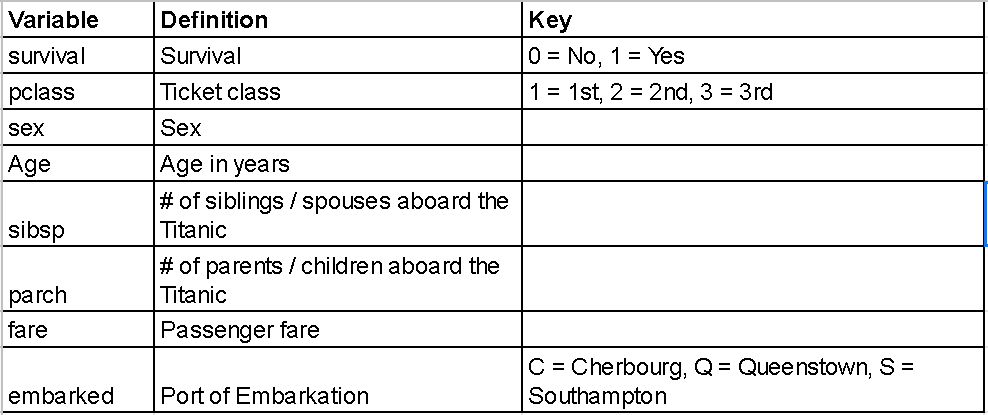

*Below is my solution to the challenge:*

In [492]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

In [493]:


import pandas as pd
url = 'https://drive.google.com/file/d/1BNrbPshNvrNHiTe1o-Cp1gpJKY-chv5Z/view?usp=sharing'
url= 'https://drive.google.com/uc?id=' + url.split('/')[-2]

titanic = pd.read_csv(url)

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [494]:
titanic.size

7128

In [495]:
titanic.shape

(891, 8)

In [496]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.870561,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.597668,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [497]:



titanic.head (10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,54.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [498]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


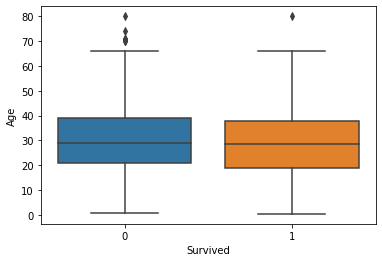

In [499]:

sns.boxplot(x = 'Survived', y = 'Age', data = titanic)

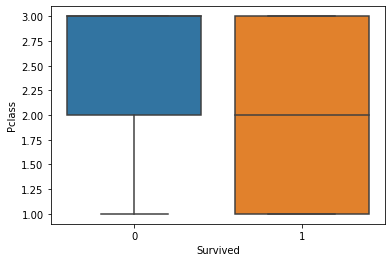

In [500]:



sns.boxplot(x = 'Survived', y = 'Pclass', data = titanic)

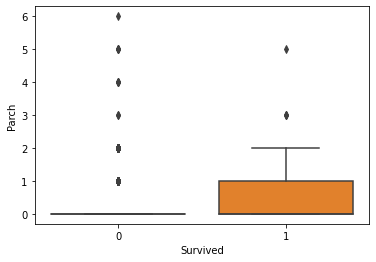

In [501]:
sns.boxplot(x = 'Survived', y = 'Parch', data = titanic)

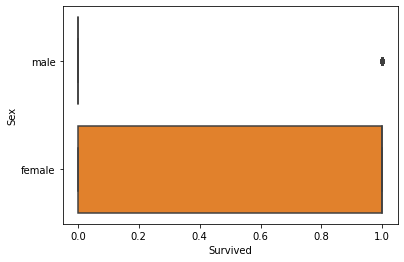

In [502]:






sns.boxplot(x = 'Survived', y = 'Sex', data = titanic)

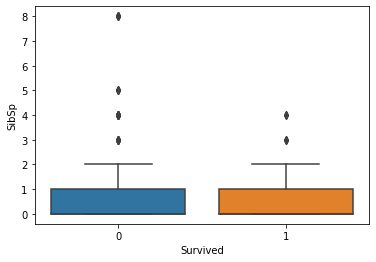

In [503]:


sns.boxplot(x = 'Survived', y = 'SibSp', data = titanic)

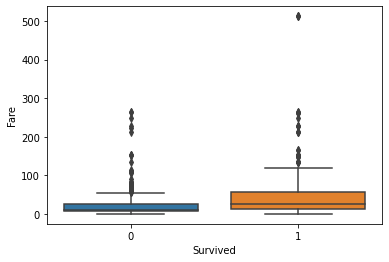

In [504]:

sns.boxplot(x = 'Survived', y = 'Fare', data = titanic)

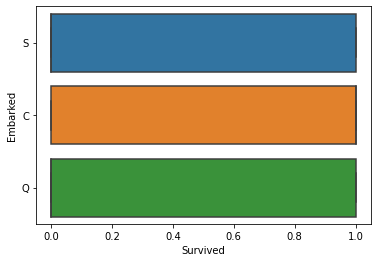

In [505]:



sns.boxplot(x = 'Survived', y = 'Embarked', data = titanic)

In [506]:

from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [507]:
 X = titanic.drop(['Survived'], axis = 'columns')
 y = titanic['Survived']


In [508]:
titanic.drop( ["Embarked"], axis= "columns", inplace= True)

In [509]:
 X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [510]:

y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [511]:
X = pd.get_dummies(X)
X.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [512]:
X.shape

(891, 10)

In [513]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [514]:
from sklearn.linear_model import LogisticRegression

logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [515]:

logistic_prediction = logisticmodel.predict(X_test)

In [516]:

def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

  

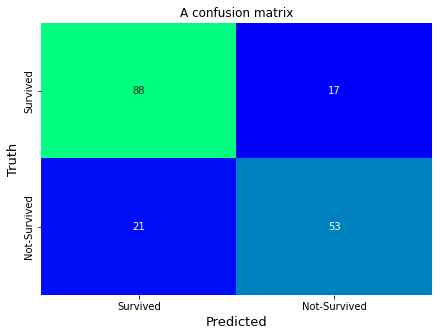

In [517]:

ConfusionMatrix(y_test, logistic_prediction, label= ["Survived", "Not-Survived"])

In [518]:


metrics.accuracy_score(y_test, logistic_prediction)

0.7877094972067039

In [519]:
print(metrics.classification_report(y_test, logistic_prediction))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [520]:


from sklearn.metrics import f1_score
print(f1_score(y_test, logistic_prediction))

0.736111111111111


In [521]:


from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)



RandomForestClassifier()

In [522]:
rf_prediction = randomforestmodel.predict(X_test)

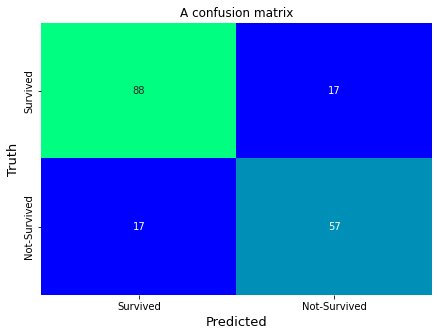

In [523]:
ConfusionMatrix(y_test, rf_prediction, label= ["Survived", "Not-Survived"])

In [524]:
metrics.accuracy_score(y_test, rf_prediction)

0.8100558659217877

In [525]:

print(metrics.classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [526]:

from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier(n_estimators= 10)
randomforestmodel.fit(X_train, y_train)



RandomForestClassifier(n_estimators=10)

In [527]:


rf_prediction = randomforestmodel.predict(X_test)

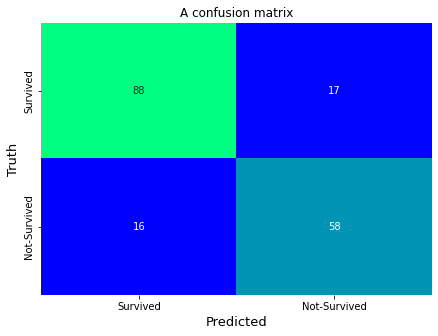

In [528]:

ConfusionMatrix(y_test, rf_prediction, label= ["Survived", "Not-Survived"])

In [529]:
metrics.accuracy_score(y_test, rf_prediction)

0.8156424581005587

In [530]:



print(metrics.classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       105
           1       0.77      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [531]:




print(metrics.f1_score(y_test, rf_prediction))

0.7785234899328859


In [532]:

print('Parameters currently in use:\n')
mod_details = randomforestmodel.get_params()
for i in mod_details:
  print(i," :", mod_details[i])
  

Parameters currently in use:

bootstrap  : True
ccp_alpha  : 0.0
class_weight  : None
criterion  : gini
max_depth  : None
max_features  : auto
max_leaf_nodes  : None
max_samples  : None
min_impurity_decrease  : 0.0
min_samples_leaf  : 1
min_samples_split  : 2
min_weight_fraction_leaf  : 0.0
n_estimators  : 10
n_jobs  : None
oob_score  : False
random_state  : None
verbose  : 0
warm_start  : False


In [533]:

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 250, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

for i in random_grid:
  print(i," :", random_grid[i])

  
  

n_estimators  : [20, 45, 71, 96, 122, 147, 173, 198, 224, 250]
max_features  : ['auto', 'sqrt']
max_depth  : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None]
min_samples_split  : [2, 5, 10]
min_samples_leaf  : [1, 2, 4]
bootstrap  : [True, False]


In [534]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=7, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 45, 71, 96, 122,
                                                         147, 173, 198, 224,
                                                         250]},
                   random_state=7, verbose=2)

In [535]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 71}

In [536]:
from sklearn.metrics import accuracy_score

base_model = RandomForestClassifier(random_state= 7)
base_model.fit(X_train, y_train)
bm_predictions = base_model.predict(X_test)
base_accuracy = metrics.accuracy_score(y_test, bm_predictions)
print("Base model Accuracy:", base_accuracy)

best_random = rf_random.best_estimator_
best_random.fit(X_train, y_train)
best_predictions = best_random.predict(X_test)
best_accuracy = metrics.accuracy_score(y_test, best_predictions)
print("Best model Accuracy:", base_accuracy)

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

Base model Accuracy: 0.8324022346368715
Best model Accuracy: 0.8324022346368715
Improvement of -2.68%.


In [537]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
#Bagging Decision Tree Classifier
#initialize base classifier
dec_tree_cls=DecisionTreeClassifier()
#number of base classifier
no_of_trees=25
#bagging classifier
bag_cls=BaggingClassifier(base_estimator=dec_tree_cls,n_estimators=no_of_trees,random_state=10, bootstrap=True, oob_score=True)
bag_cls.fit(X_train,y_train)
bag_cls.predict(X_test)
print("Bagging Classifier Accuracy ",bag_cls.score(X_test,y_test))

Bagging Classifier Accuracy  0.7877094972067039


In [538]:
print(classification_report(y_test,bag_cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       105
           1       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179



In [539]:
from sklearn.tree import DecisionTreeClassifier 

In [540]:
clf = DecisionTreeClassifier()

In [541]:
clf = clf.fit(X_train,y_train)

In [542]:
y_pred = clf.predict(X_test)

In [543]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7932960893854749


In [544]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)


In [545]:
clf = clf.fit(X_train,y_train)


In [546]:
y_pred = clf.predict(X_test)

In [547]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7988826815642458


In [548]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [549]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1,1.25,1.50]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=53, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)
print("Learning rate: ", learning_rate)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))

Learning rate:  1.5
Accuracy score (training): 0.867


In [550]:

from sklearn.metrics import classification_report


In [551]:
from sklearn.ensemble import GradientBoostingClassifier

In [552]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()


{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [553]:

gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



Thanks for checking out this project.

I'm open to receiving your review on the project (comment on my github account). Thank you!